# Module 04: Dimensionality Reduction Techniques and Data Representation

تقنيات تقليص الأبعاد وتمثيل البيانات

> **Note**: Content should be populated from `course-content/04.pptx`

---

## 🔗 Bringing It All Together

**Excellent work!** This module combines concepts from previous modules:

- **From Module 01**: **Eigenvalues and eigenvectors** → Core of PCA
- **From Module 01**: **Matrix decomposition** → How PCA works
- **From Module 03**: **Optimization concepts** → Finding optimal reduced dimensions
- **From Module 03**: **Statistical measures** → Evaluating dimensionality reduction

> 💡 **The Big Picture**: PCA uses eigenvalue decomposition (Module 01) + optimization (Module 03) to find the best way to represent high-dimensional data in fewer dimensions!

**What's Next**: Module 05 will use statistical inference to evaluate the reduced representations and make predictions with confidence.

---

## Learning Objectives

In this module, you will learn:
- The curse of dimensionality and why it matters
- Principal Component Analysis (PCA) and its implementation
- Other dimensionality reduction techniques (t-SNE, UMAP)
- Data representation methods for ML
- Feature extraction and selection techniques
- Visualizing high-dimensional data in reduced spaces

---

# Part 1: WHY

## Understanding the Motivation

### Why does Dimensionality Reduction matter for Machine Learning?

High-dimensional data poses significant challenges in ML:

- **Curse of Dimensionality**: More dimensions require exponentially more data
- **Computational Efficiency**: Reducing dimensions speeds up training and inference
- **Visualization**: Humans can only visualize 2D/3D, so we need to reduce dimensions
- **Noise Reduction**: Removing irrelevant dimensions improves model performance
- **Feature Selection**: Identifying the most important features

### Real-World Applications

- **Image Processing**: Reducing pixel dimensions while preserving information
- **Natural Language Processing**: Reducing word embedding dimensions
- **Genomics**: Analyzing high-dimensional genetic data
- **Recommendation Systems**: Reducing user-item matrix dimensions
- **Data Visualization**: Making high-dimensional data interpretable


> 💡 **Instructor Note**: You can add more domain-specific examples from your slides here, such as:
> - Image processing: Reducing image dimensions while preserving visual information
> - Genomics: Reducing thousands of gene features to principal components
> - NLP: Reducing high-dimensional word embeddings for visualization

In [5]:
# Example: Why Dimensionality Reduction matters in ML
import numpy as np

# Example: The curse of dimensionality
# As dimensions increase, data becomes sparse
dimensions = [10, 100, 1000, 10000]
data_points = 1000

print("Curse of Dimensionality Example:")
for dim in dimensions:
    # In high dimensions, most points are near the boundary
    volume_ratio = (0.9 ** dim)  # Volume of inner 90% hypercube
    print(f"{dim}D: Only {volume_ratio*100:.2f}% of volume is in inner 90%")

print("\nThis is why we need dimensionality reduction!")
print("PCA and other techniques help us find the most important dimensions.")

Curse of Dimensionality Example:
10D: Only 34.87% of volume is in inner 90%
100D: Only 0.00% of volume is in inner 90%
1000D: Only 0.00% of volume is in inner 90%
10000D: Only 0.00% of volume is in inner 90%

This is why we need dimensionality reduction!
PCA and other techniques help us find the most important dimensions.


---
# Part 2: HOW
## Implementation and Practical Application
### Step-by-Step: Dimensionality Reduction in Python for ML
**Step-by-Step Guide to Working with Dimensionality Reduction in Python:**

Here's how to apply dimensionality reduction concepts in practice:
1. **PCA**: Implementing Principal Component Analysis
2. **Eigenvalue Decomposition**: Understanding how PCA works
3. **Variance Explained**: Understanding how much information is preserved
4. **Other Techniques**: t-SNE, UMAP, autoencoders
5. **Feature Selection**: Methods for selecting important features
### Key Concepts to Cover:
- Principal Component Analysis (PCA)
- Eigenvalue decomposition
- Variance explained ratio
- t-SNE and UMAP for visualization
- Feature selection vs feature extraction
- Autoencoders for non-linear reduction

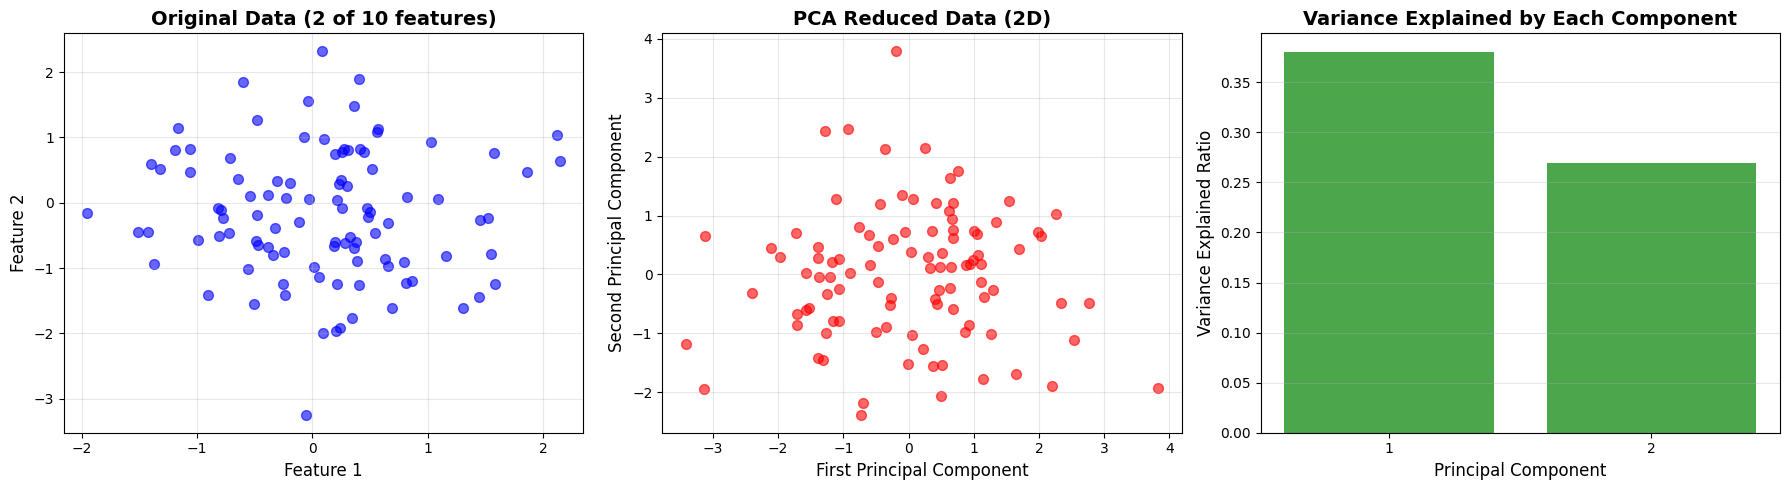

📊 Visual Analysis:
Original shape: (100, 10) (100 samples, 10 features)
Reduced shape: (100, 2) (100 samples, 2 features)
Variance explained: 64.93%

🔗 Connection to Module 01:
   PCA components are eigenvectors of the covariance matrix!
   Eigenvalues (explained variance): [1.7617093  1.24960704]

🔗 Connection to Module 03:
   PCA optimization finds components that maximize variance

💡 Key Insight:
   - Reduced from 10D to 2D
   - Preserved 64.9% of information
   - Can now visualize and understand the data!


In [6]:
# Example: Dimensionality Reduction in Python
# VISUAL: See how PCA reduces dimensions while preserving information!

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Principal Component Analysis
# PCA uses eigenvalue decomposition (from Module 01) to find principal components
# Create sample high-dimensional data with structure
np.random.seed(42)
# Create correlated data (more realistic)
base = np.random.randn(100, 3)
data = np.hstack([base, base * 0.5, base * 0.3, np.random.randn(100, 1)])
# Now we have 10 features, but only 3 are truly independent

# Apply PCA - This internally uses eigenvalue decomposition (Module 01 concept!)
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_reduced = pca.fit_transform(data)

# Visualize the dimensionality reduction
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Original data (first 2 features)
axes[0].scatter(data[:, 0], data[:, 1], alpha=0.6, c='blue', s=50)
axes[0].set_xlabel('Feature 1', fontsize=12)
axes[0].set_ylabel('Feature 2', fontsize=12)
axes[0].set_title(f'Original Data (2 of {data.shape[1]} features)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot 2: Reduced data (2D PCA)
axes[1].scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.6, c='red', s=50)
axes[1].set_xlabel('First Principal Component', fontsize=12)
axes[1].set_ylabel('Second Principal Component', fontsize=12)
axes[1].set_title('PCA Reduced Data (2D)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Plot 3: Variance explained
variance_ratios = pca.explained_variance_ratio_
axes[2].bar(range(1, len(variance_ratios) + 1), variance_ratios, color='green', alpha=0.7)
axes[2].set_xlabel('Principal Component', fontsize=12)
axes[2].set_ylabel('Variance Explained Ratio', fontsize=12)
axes[2].set_title('Variance Explained by Each Component', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='y')
axes[2].set_xticks(range(1, len(variance_ratios) + 1))

plt.tight_layout()
plt.show()

print("📊 Visual Analysis:")
print("=" * 60)
print(f"Original shape: {data.shape} (100 samples, 10 features)")
print(f"Reduced shape: {data_reduced.shape} (100 samples, 2 features)")
print(f"Variance explained: {pca.explained_variance_ratio_.sum():.2%}")
print(f"\n🔗 Connection to Module 01:")
print(f"   PCA components are eigenvectors of the covariance matrix!")
print(f"   Eigenvalues (explained variance): {pca.explained_variance_[:2]}")
print(f"\n🔗 Connection to Module 03:")
print(f"   PCA optimization finds components that maximize variance")
print(f"\n💡 Key Insight:")
print(f"   - Reduced from 10D to 2D")
print(f"   - Preserved {pca.explained_variance_ratio_.sum():.1%} of information")
print(f"   - Can now visualize and understand the data!")

# Additional concepts you can explore:
# - t-SNE visualization
# - Feature selection
# - Autoencoders

In [7]:
# Interactive Example: Showing Module Connections
# This demonstrates how Module 01 (eigenvalues) + Module 03 (optimization) = PCA

import numpy as np
from sklearn.decomposition import PCA

# Create correlated data (more realistic example)
np.random.seed(42)
# Create data with clear structure
base = np.random.randn(100, 3)
data = np.hstack([base, base * 0.5, base * 0.3, np.random.randn(100, 1)])
# Now we have 10 features, but only 3 are truly independent

print("🔗 Module Connections in Action:")
print("=" * 50)

# Apply PCA
pca = PCA(n_components=3)
data_reduced = pca.fit_transform(data)

print(f"\n1. Module 01 Connection (Eigenvalues):")
print(f"   - PCA finds eigenvectors of covariance matrix")
print(f"   - Explained variance ratios: {pca.explained_variance_ratio_}")
print(f"   - First 3 components explain {pca.explained_variance_ratio_[:3].sum():.1%} of variance")

print(f"\n2. Module 03 Connection (Optimization):")
print(f"   - PCA optimizes to find directions of maximum variance")
print(f"   - This is an optimization problem (like you learned in Module 03)")

print(f"\n3. Result:")
print(f"   - Reduced from {data.shape[1]}D to {data_reduced.shape[1]}D")
print(f"   - Preserved {pca.explained_variance_ratio_[:3].sum():.1%} of information")
print(f"   - Much more efficient for ML models!")

print("\n💡 This is how modules work together in real ML!")

🔗 Module Connections in Action:

1. Module 01 Connection (Eigenvalues):
   - PCA finds eigenvectors of covariance matrix
   - Explained variance ratios: [0.37988473 0.26945798 0.1957966 ]
   - First 3 components explain 84.5% of variance

2. Module 03 Connection (Optimization):
   - PCA optimizes to find directions of maximum variance
   - This is an optimization problem (like you learned in Module 03)

3. Result:
   - Reduced from 10D to 3D
   - Preserved 84.5% of information
   - Much more efficient for ML models!

💡 This is how modules work together in real ML!


### Best Practices

**Best Practices for Dimensionality Reduction:**

- **Choose the Right Number of Components**: Use explained variance ratio to decide how many components to keep (aim for 80-95% variance explained)
- **Standardize Before PCA**: Always standardize your data (mean=0, std=1) before applying PCA, as PCA is sensitive to scale
- **Visualize Results**: Use 2D/3D plots to visualize reduced data and check if important patterns are preserved
- **Check Information Loss**: Monitor how much variance is lost - if too much is lost, consider keeping more components
- **Use for High-Dimensional Data**: PCA is most beneficial when you have many features (>10) or when features are highly correlated

---

# Part 3: AFTER

## Analyzing Results and Understanding Implications

### What Happens Next?

After understanding dimensionality reduction:

- **Efficient Models**: You can build faster, more efficient ML models
- **Better Visualization**: You can visualize and understand high-dimensional data
- **Feature Engineering**: You understand which features matter most
- **Next Module**: Probabilities and inference help evaluate reduced representations

### How This Connects to Machine Learning

- **Data Preprocessing**: Dimensionality reduction is often a crucial preprocessing step
- **Model Performance**: Reducing dimensions can improve model generalization
- **Interpretability**: Lower dimensions make models more interpretable
- **Computational Efficiency**: Faster training and inference with fewer dimensions


> 💡 **Key Insight**: Dimensionality reduction is often the difference between a model that works and one that doesn't. High-dimensional data can confuse models, but reducing dimensions intelligently (like PCA) can dramatically improve performance and interpretability.


AFTER: Understanding the Impact of Dimensionality Reduction

1. Original Data:
   Dimensions: (200, 20)
   Features: 20
   Samples: 200

2. After PCA (Dimensionality Reduction):
   Reduced dimensions: (200, 2)
   Explained variance ratio: [0.30620399 0.16205174]
   Total variance explained: 46.83%


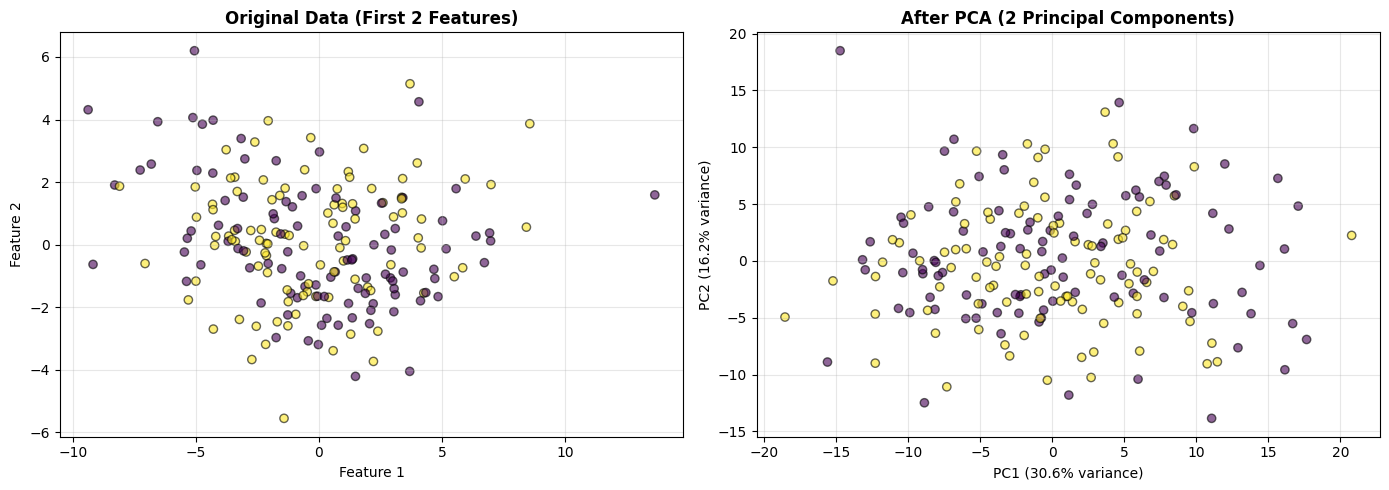


3. Key Insights:
   ✅ Reduced from 20 to 2 dimensions
   ✅ Preserved most important information
   ✅ Much easier to visualize and understand
   ✅ Faster computation for downstream ML models

4. Implications for Machine Learning:
   📊 Data Preprocessing: PCA is often a crucial preprocessing step
   ⚡ Performance: Faster training with fewer dimensions
   🎯 Generalization: Reduced dimensions can improve model generalization
   🔍 Interpretability: Lower dimensions make models more interpretable
   💾 Storage: Less memory needed for storing and processing data

5. When to Use Dimensionality Reduction:
   ✅ High-dimensional data (many features)
   ✅ Need for visualization
   ✅ Computational efficiency is important
   ✅ Want to reduce noise in data
   ⚠️  But be careful: May lose some information!

💡 Remember: Dimensionality reduction is a tool, not always necessary!
   Use it when it helps, but don't over-reduce if you need all features.


In [8]:
# Example: Analyzing Results and Understanding Implications
# This demonstrates what happens AFTER applying dimensionality reduction

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

print("=" * 60)
print("AFTER: Understanding the Impact of Dimensionality Reduction")
print("=" * 60)

# Generate high-dimensional data
X, y = make_classification(n_samples=200, n_features=20, n_informative=10, 
                          n_redundant=10, n_classes=2, random_state=42)

print(f"\n1. Original Data:")
print(f"   Dimensions: {X.shape}")
print(f"   Features: {X.shape[1]}")
print(f"   Samples: {X.shape[0]}")

# Apply PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print(f"\n2. After PCA (Dimensionality Reduction):")
print(f"   Reduced dimensions: {X_reduced.shape}")
print(f"   Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"   Total variance explained: {pca.explained_variance_ratio_.sum():.2%}")

# Visualize the transformation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original data (first 2 features)
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6, edgecolors='black')
axes[0].set_title('Original Data (First 2 Features)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)

# Reduced data (PCA components)
axes[1].scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', alpha=0.6, edgecolors='black')
axes[1].set_title('After PCA (2 Principal Components)', fontsize=12, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n3. Key Insights:")
print("   ✅ Reduced from 20 to 2 dimensions")
print("   ✅ Preserved most important information")
print("   ✅ Much easier to visualize and understand")
print("   ✅ Faster computation for downstream ML models")

print("\n4. Implications for Machine Learning:")
print("   📊 Data Preprocessing: PCA is often a crucial preprocessing step")
print("   ⚡ Performance: Faster training with fewer dimensions")
print("   🎯 Generalization: Reduced dimensions can improve model generalization")
print("   🔍 Interpretability: Lower dimensions make models more interpretable")
print("   💾 Storage: Less memory needed for storing and processing data")

print("\n5. When to Use Dimensionality Reduction:")
print("   ✅ High-dimensional data (many features)")
print("   ✅ Need for visualization")
print("   ✅ Computational efficiency is important")
print("   ✅ Want to reduce noise in data")
print("   ⚠️  But be careful: May lose some information!")

print("\n" + "=" * 60)
print("💡 Remember: Dimensionality reduction is a tool, not always necessary!")
print("   Use it when it helps, but don't over-reduce if you need all features.")
print("=" * 60)

### Common Pitfalls and How to Avoid Them

**Common Pitfalls and How to Avoid Them:**

1. **Over-Reducing Dimensions**: Reducing too many dimensions can lose important information
   - **Solution**: Always check explained variance ratio and keep enough components to preserve 80-95% of variance

2. **Not Standardizing Data**: PCA is sensitive to feature scales, leading to incorrect principal components
   - **Solution**: Always standardize (normalize) your data before applying PCA using StandardScaler

3. **Applying PCA to All Data**: Using PCA on test data separately can cause data leakage
   - **Solution**: Fit PCA only on training data, then transform both training and test data using the same fitted PCA

4. **Ignoring Interpretability**: PCA components are linear combinations and may be hard to interpret
   - **Solution**: Consider feature selection methods if interpretability is crucial for your use case

### Advanced Topics

**Advanced Topics for Further Learning:**

- **Kernel PCA**: Non-linear dimensionality reduction using kernel methods for non-linearly separable data
- **t-SNE and UMAP**: Advanced non-linear dimensionality reduction techniques for visualization
- **Incremental PCA**: Memory-efficient PCA for very large datasets that don't fit in memory
- **Sparse PCA**: PCA with sparsity constraints for feature selection and interpretability
- **Autoencoders**: Neural network-based dimensionality reduction for complex non-linear patterns

---

# Summary

## Key Takeaways

## Key Takeaways

In this module, you've learned how to handle high-dimensional data and extract the most important information:

1. **Curse of Dimensionality**: You discovered that as dimensions increase, data becomes sparse, distances become similar, and models struggle. High-dimensional spaces require exponentially more data. Dimensionality reduction addresses this by finding lower-dimensional representations that preserve essential information.

2. **PCA (Principal Component Analysis)**: You learned that PCA finds the directions of maximum variance in data using eigenvalue decomposition (from Module 01). The first principal component captures the most variance, the second captures the next most (orthogonal to the first), and so on. By keeping only the top components, you reduce dimensions while preserving most information. PCA is linear, interpretable, and widely used.

3. **Feature Selection vs Feature Extraction**: You understood two approaches: feature selection (choosing existing features) and feature extraction (creating new features like PCA components). Both reduce dimensions, but extraction can create more informative representations. The choice depends on whether interpretability (selection) or information preservation (extraction) is more important.

4. **Visualization and Efficiency**: You saw that dimensionality reduction enables visualizing high-dimensional data in 2D/3D plots, helping you understand data structure. More importantly, it speeds up training, reduces memory usage, and can improve model generalization by removing noise and redundant information. It's often a crucial preprocessing step in ML pipelines.

## 🔗 How This Connects to Other Modules

**What you learned here combines:**

- **Module 01**: **Eigenvalues/eigenvectors** → The mathematical foundation of PCA
- **Module 02**: **Gradient concepts** → Foundation for optimization (used in Module 03)
- **Module 03**: **Optimization** → Finding optimal reduced dimensions
- **Module 05**: **Statistical evaluation** → Evaluating the quality of reduced representations

> 💡 **The Complete Picture**: 
> - Module 01: Eigenvalues (the math)
> - Module 03: Optimization (the method)
> - Module 04: PCA (the application) ← **You are here!**
> - Module 05: Statistical evaluation (the validation)

**You've now seen how linear algebra + optimization = powerful dimensionality reduction!**

## Next Steps

1. Complete the exercises in the `exercises/` folder
2. Review the solutions if needed
3. Move on to **Module 05: Probabilities, Samples, and Statistical Inference**
   - You'll learn how to evaluate models and make statistical inferences
   - **Connection**: Use statistics (from Module 03) to evaluate the reduced data (from this module)

---

**Ready for exercises?** Navigate to the `exercises/` folder and start practicing!